In [1]:
import torch
import transformers

In [2]:
print(torch.cuda.is_available())

True


In [3]:
from PIL import Image
import requests
from IPython.display import display
from transformers import AutoProcessor, Blip2ForConditionalGeneration

def display_image(url):
  image = Image.open(requests.get(url, stream=True).raw)
  display(image)
  return image

In [4]:
def load_model():
  processor = AutoProcessor.from_pretrained('Salesforce/blip2-opt-2.7b')
  model = Blip2ForConditionalGeneration.from_pretrained('Salesforce/blip2-opt-2.7b', torch_dtype=torch.float16)
  return model, processor

In [5]:
model, processor = load_model()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
model.to('cuda')

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

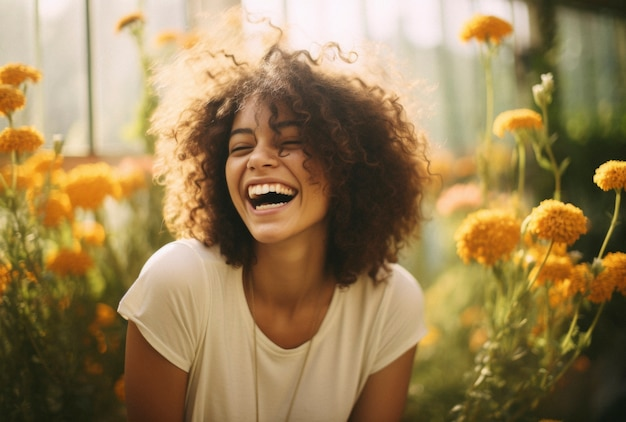

In [7]:
url = 'https://img.freepik.com/free-photo/photorealistic-happiness-scene-with-happy-woman_23-2151423469.jpg?size=626&ext=jpg&ga=GA1.1.2008272138.1720569600&semt=ais_user'
image=display_image(url)

In [14]:
task_prompt= 'Question: what is the emotion portrayed in the image? Answer:'
inputs = processor(image, text=task_prompt, return_tensors='pt').to('cuda', torch.float16)
generated_ids = model.generate(input_ids=inputs['input_ids'],
                               pixel_values=inputs['pixel_values'], max_length=50)
generated_emotion = processor.batch_decode(generated_ids, skip_special_tokens=True)
generated_emotion

[' happiness\n']

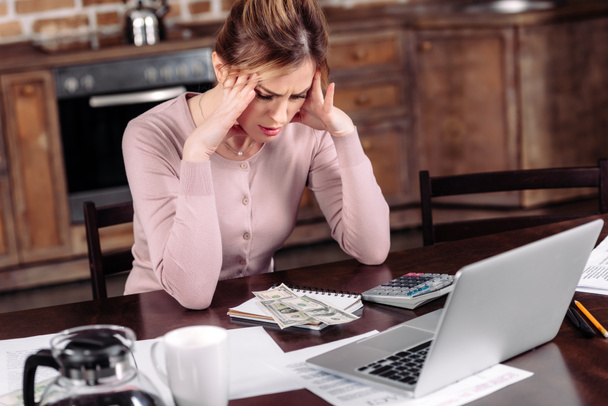

In [15]:
url = 'https://cdn.create.vista.com/api/media/small/183859622/stock-photo-portrait-frustrated-woman-sitting-table-money-laptop-papers-home-financial'
image=display_image(url)

In [16]:
task_prompt= 'Question: what is the emotion portrayed in the image? Answer:'
inputs = processor(image, text=task_prompt, return_tensors='pt').to('cuda', torch.float16)
generated_ids = model.generate(input_ids=inputs['input_ids'],
                               pixel_values=inputs['pixel_values'], max_length=50)
generated_emotion = processor.batch_decode(generated_ids, skip_special_tokens=True)
generated_emotion

[' stress\n']